In [1]:
import dowhy
from dowhy import CausalModel
import pandas as pd
import matplotlib.pyplot as plt

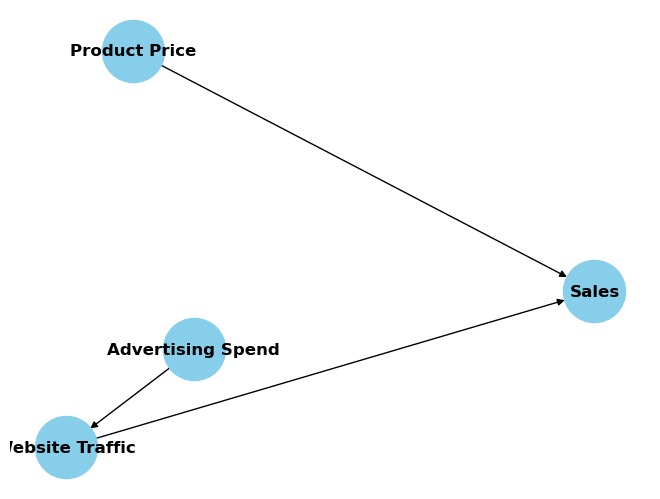

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.DiGraph()

# Add nodes
G.add_nodes_from(["Advertising Spend", "Website Traffic", "Product Price", "Sales"])

# Add edges
G.add_edges_from([
    ("Advertising Spend", "Website Traffic"),
    ("Website Traffic", "Sales"),
    ("Product Price", "Sales")
])

# Draw the graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=2000, node_color="skyblue", font_size=12, font_weight="bold", arrows=True)
plt.show()


In [6]:
# Example data
data = pd.DataFrame({
    "Advertising Spend": [100, 200, 300, 400, 500],
    "Website Traffic": [20, 40, 60, 80, 100],
    "Product Price": [10, 10, 15, 15, 20],
    "Sales": [5, 10, 8, 6, 3]
})

In [9]:
# Define the causal model
model = CausalModel(
    data=data,
    treatment="Advertising Spend",
    outcome="Sales",
    graph=G  # Using the graph from above
)

In [10]:
# Identify the effect using back-door criterion
identified_estimand = model.identify_effect()

In [11]:
# Estimate the effect
estimate = model.estimate_effect(identified_estimand, method_name="backdoor.linear_regression")

# Output the estimated effect
print(estimate)

c:\Users\wallj\anaconda3\envs\pymc_env\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
c:\Users\wallj\anaconda3\envs\pymc_env\Lib\site-packages\dowhy\causal_estimator.py:236: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  by_effect_mods = data.groupby(effect_modifier_names)
c:\Users\wallj\anaconda3\envs\pymc_env\Lib\site-packages\dowhy\causal_estimators\regression_estimator.py:179: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter 

ValueError: zero-size array to reduction operation maximum which has no identity